### Install and Import Libraries

In [ ]:
# # !pip install nibabel
# # !pip install opencv-python

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage import metrics
import nibabel as nib
import glob
import pandas as pd
from scipy.signal import lfilter
import pickle

### Data Loading

In [ ]:
def slice_show(image, slice_no):
    """ 
    A function to visualize 2D slices from 3D volume Image.
    Inputs 
      image: 3D Nifti Image
      slice_no: Which Slice you want to visualize
    Outputs
      plot the images
    
    """
    plt.figure()
    plt.axis('off')
    plt.imshow(image[:,:,slice_no].T, cmap='gray')

In [ ]:
# Id's of the given images
data_list = ['1003', '1004', '1005', '1018', '1019', '1023', '1024', '1025',
            '1038', '1039', '1101', '1104', '1107', '1110', '1113', '1116',
            '1119', '1122', '1125', '1128'] 

#Important directories for OS Operation
elastix_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\elastix'



atlas_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\atlas\\'
input_img_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\test-set\\testing-images\\'
output_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\outputs\\'
mni_output_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\mni_outputs\\'

input_lbl_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\test-set\\testing-labels\\'
input_mask_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\test-set\\testing-mask\\'


parameter_affine_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\Par009Affine.txt'
parameter_elastic_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\Par009Elastic.txt'

### Evaluation Metric

In [ ]:
def dice(SI, GT):
  #   2 * TP / (FN + (2 * TP) + FP)
  intersection = np.logical_and(SI, GT)
  return 2. * intersection.sum() / (SI.sum() + GT.sum())

### Image Registration

In [ ]:
# Block for generating Image Registration of atlas for each fixed image
# Getting the names for each image
for fixed in data_list:

    #temporary output directory for fixed image 
    current_output_directory = output_directory + fixed + '\\'
    
    # Location for the fixed image
    current_fixed_directory = input_img_directory + fixed + '.nii'
    
    # Atlas directory and intensity atlas
    current_moving_directory = atlas_directory + 'intensity_atlas.nii'
   

    # Generating Image Registration for all the fixed images (Run Once)
    # os.system("cd /d F: && cd "+elastix_directory+"&& elastix -f "+current_fixed_directory+" -m "+current_moving_directory+" -out "+current_output_directory+" -p "+parameter_affine_directory+" -p "+parameter_elastic_directory+"")

### Label Propagation

In [ ]:
# Label transformation for Probabilistic Atlas
csf_prob_atlas_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\atlas\\probabilistic_atlas_csf.nii'
wm_prob_atlas_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\atlas\\probabilistic_atlas_wm.nii'
gm_prob_atlas_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\atlas\\probabilistic_atlas_gm.nii'

# Locations for the deformation field and outputs
parameter_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\outputs\\'

for data in data_list:
    # The final transformation matrix generated after Image Registration
    current_parameter_directory = parameter_directory + data + '\\TransformParameters.1.txt'
    
    current_output_directory = parameter_directory + data
    current_csf_output_directory = current_output_directory + '\\csf\\'
    # Transform the labels too using the matrix generated after image registration (Run Once)
    # os.system("cd /d F: && cd "+elastix_directory+"&& transformix -in "+csf_prob_atlas_directory+" -out "+current_csf_output_directory+" -tp "+current_parameter_directory+"")
    current_wm_output_directory = current_output_directory + '\\wm\\'
    # Transform the labels too using the matrix generated after image registration (Run Once)
    # os.system("cd /d F: && cd "+elastix_directory+"&& transformix -in "+wm_prob_atlas_directory+" -out "+current_wm_output_directory+" -tp "+current_parameter_directory+"")
    current_gm_output_directory = current_output_directory + '\\gm\\'
    # Transform the labels too using the matrix generated after image registration (Run Once)
    # os.system("cd /d F: && cd "+elastix_directory+"&& transformix -in "+gm_prob_atlas_directory+" -out "+current_gm_output_directory+" -tp "+current_parameter_directory+"")


### MNI Atlas (4D to 3D)

In [ ]:
# directories for mni atlas
mni_intensity_atlas = 'F:\\udG\\MISA\\Labs\\Lab3\\MNITemplateAtlas\\template.nii'

mni_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\MNITemplateAtlas\\'

mni_probabilistic_atlas_4D_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\MNITemplateAtlas\\atlas.nii'

#loading 4D Atlas image
mni_probabilistic_atlas_4D_data = nib.load(mni_probabilistic_atlas_4D_directory)
# 4D Atlas image data
mni_probabilistic_atlas_4D_img = mni_probabilistic_atlas_4D_data.get_fdata()

# Splitting the tissues from 4D image 
mni_probabilistic_atlas_csf = mni_probabilistic_atlas_4D_img[:,:,:,1]
mni_probabilistic_atlas_wm = mni_probabilistic_atlas_4D_img[:,:,:,3]
mni_probabilistic_atlas_gm = mni_probabilistic_atlas_4D_img[:,:,:,2]

# Saving the mni atlas for three tissues
mni_probabilistic_atlas_csf_nifti = nib.Nifti1Image(mni_probabilistic_atlas_csf, mni_probabilistic_atlas_4D_data.affine, mni_probabilistic_atlas_4D_data.header)
# nib.save(mni_probabilistic_atlas_csf_nifti, mni_directory + 'mni_probabilistic_atlas_csf.nii')

mni_probabilistic_atlas_wm_nifti = nib.Nifti1Image(mni_probabilistic_atlas_wm, mni_probabilistic_atlas_4D_data.affine, mni_probabilistic_atlas_4D_data.header)
# nib.save(mni_probabilistic_atlas_wm_nifti, mni_directory + 'mni_probabilistic_atlas_wm.nii')

mni_probabilistic_atlas_gm_nifti = nib.Nifti1Image(mni_probabilistic_atlas_gm, mni_probabilistic_atlas_4D_data.affine, mni_probabilistic_atlas_4D_data.header)
# nib.save(mni_probabilistic_atlas_gm_nifti, mni_directory + 'mni_probabilistic_atlas_gm.nii')

### Image Registration using MNI Atlas

In [ ]:
# Block for generating Image Registration of atlas for each fixed image
# Getting the names for each image
for fixed in data_list:

    #temporary output directory for fixed image 
    current_mni_output_directory = mni_output_directory + fixed + '\\'
    
    # Location for the fixed image
    current_fixed_directory = input_img_directory + fixed + '.nii'
    
    # Atlas directory and intensity atlas
    current_moving_directory = mni_intensity_atlas
   

    # Generating Image Registration for all the fixed images (Run Once)
    # os.system("cd /d F: && cd "+elastix_directory+"&& elastix -f "+current_fixed_directory+" -m "+current_moving_directory+" -out "+current_mni_output_directory+" -p "+parameter_affine_directory+" -p "+parameter_elastic_directory+"")

### Label Propagation using MNI Atlas

In [ ]:
# Label transformation for Probabilistic Atlas
mni_csf_prob_atlas_directory = mni_directory + 'mni_probabilistic_atlas_csf.nii' 
mni_wm_prob_atlas_directory = mni_directory + 'mni_probabilistic_atlas_wm.nii'
mni_gm_prob_atlas_directory = mni_directory + 'mni_probabilistic_atlas_gm.nii'
# Locations for the deformation field and outputs
mni_parameter_directory = 'F:\\udG\\MISA\\Labs\\Lab3\\mni_outputs\\'

for data in data_list:
    
    # The final transformation matrix generated after Image Registration
    current_parameter_directory = mni_parameter_directory + data + '\\TransformParameters.1.txt'
    
    # location to store the outputs 
    current_output_directory = mni_parameter_directory + data
    current_csf_output_directory = current_output_directory + '\\csf\\'
    # Transform the labels too using the matrix generated after image registration (Run Once)
    # os.system("cd /d F: && cd "+elastix_directory+"&& transformix -in "+mni_csf_prob_atlas_directory+" -out "+current_csf_output_directory+" -tp "+current_parameter_directory+"")
    current_wm_output_directory = current_output_directory + '\\wm\\'
    # Transform the labels too using the matrix generated after image registration (Run Once)
    # os.system("cd /d F: && cd "+elastix_directory+"&& transformix -in "+mni_wm_prob_atlas_directory+" -out "+current_wm_output_directory+" -tp "+current_parameter_directory+"")
    current_gm_output_directory = current_output_directory + '\\gm\\'
    # Transform the labels too using the matrix generated after image registration (Run Once)
    # os.system("cd /d F: && cd "+elastix_directory+"&& transformix -in "+mni_gm_prob_atlas_directory+" -out "+current_gm_output_directory+" -tp "+current_parameter_directory+"")

### 1.1 Tissue Model Computation

In [ ]:
parent_directory= 'F:\\udG\\MISA\\Labs\\Lab3\\'
test_images_directory= parent_directory+'test-set\\testing-images'
test_labels_directory= parent_directory+'test-set\\testing-labels'
test_masks_directory= parent_directory+'test-set\\testing-mask'
normalized_histogram_csf_directory=parent_directory+'normalized_histogram_csf.npy'
normalized_histogram_wm_directory=parent_directory+'normalized_histogram_wm.npy'
normalized_histogram_gm_directory=parent_directory+'normalized_histogram_gm.npy'
smoothed_histogram_csf_directory=parent_directory+'smoothed_histogram_csf.npy'
smoothed_histogram_wm_directory=parent_directory+'smoothed_histogram_wm.npy'
smoothed_histogram_gm_directory=parent_directory+'smoothed_histogram_gm.npy'
intensities_directory= parent_directory+'intensities.npy'
epsilon= 1e-07
test_images = sorted(glob.glob(os.path.join(test_images_directory,"*.nii")))
test_labels = sorted(glob.glob(os.path.join(test_labels_directory,"*nii")))
test_masks= sorted(glob.glob(os.path.join(test_masks_directory,"*nii")))
normalized_histogram_csf= np.load(open(normalized_histogram_csf_directory,'rb'))
normalized_histogram_wm= np.load(open(normalized_histogram_wm_directory,'rb'))
normalized_histogram_gm= np.load(open(normalized_histogram_gm_directory,'rb'))
smoothed_histogram_csf= np.load(open(smoothed_histogram_csf_directory,'rb'))
smoothed_histogram_wm= np.load(open(smoothed_histogram_wm_directory,'rb'))
smoothed_histogram_gm= np.load(open(smoothed_histogram_gm_directory,'rb'))
intensities= np.load(open(intensities_directory,'rb'))

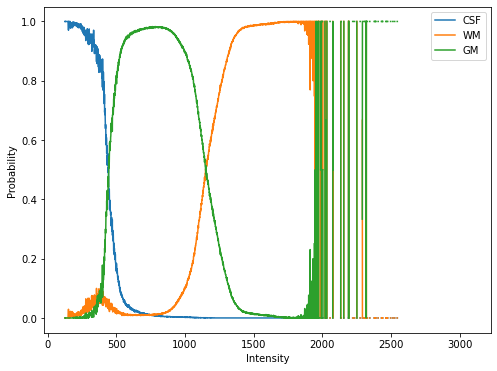

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(intensities,normalized_histogram_csf,label='CSF')
plt.plot(intensities,normalized_histogram_wm,label='WM')
plt.plot(intensities,normalized_histogram_gm,label='GM')
plt.ylabel('Probability')
plt.xlabel('Intensity')
plt.legend(loc='upper right')

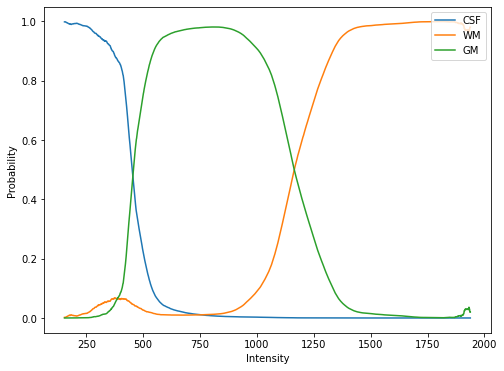

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(intensities,smoothed_histogram_csf,label='CSF')
plt.plot(intensities,smoothed_histogram_wm,label='WM')
plt.plot(intensities,smoothed_histogram_gm,label='GM')
plt.ylabel('Probability')
plt.xlabel('Intensity')
plt.legend(loc='upper right')

In [ ]:
for i,j,k in zip(range(len(normalized_histogram_csf)), range(len(normalized_histogram_wm)), range(len(normalized_histogram_gm))):
  if np.isnan(normalized_histogram_csf[i]) == True: 
    normalized_histogram_csf[i] = epsilon
  if np.isnan(normalized_histogram_wm[j]) == True:
    normalized_histogram_wm[j] = epsilon
  if np.isnan(normalized_histogram_gm[k]) == True:
    normalized_histogram_gm[k] = epsilon 

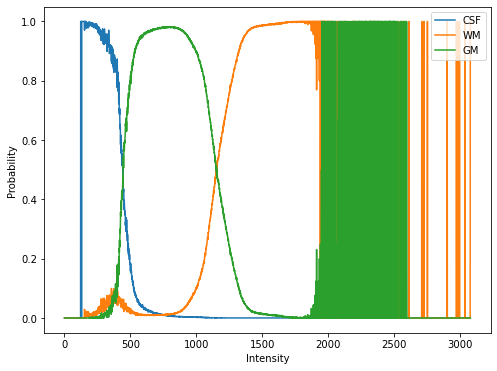

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(intensities,normalized_histogram_csf,label='CSF')
plt.plot(intensities,normalized_histogram_wm,label='WM')
plt.plot(intensities,normalized_histogram_gm,label='GM')
plt.ylabel('Probability')
plt.xlabel('Intensity')
plt.legend(loc='upper right')

In [ ]:
for i,j,k in zip(range(len(smoothed_histogram_csf)), range(len(smoothed_histogram_wm)), range(len(smoothed_histogram_gm))):
  if np.isnan(smoothed_histogram_csf[i]) == True: 
    smoothed_histogram_csf[i] = epsilon
  if np.isnan(smoothed_histogram_wm[j]) == True:
    smoothed_histogram_wm[j] = epsilon
  if np.isnan(smoothed_histogram_gm[k]) == True:
    smoothed_histogram_gm[k] = epsilon 

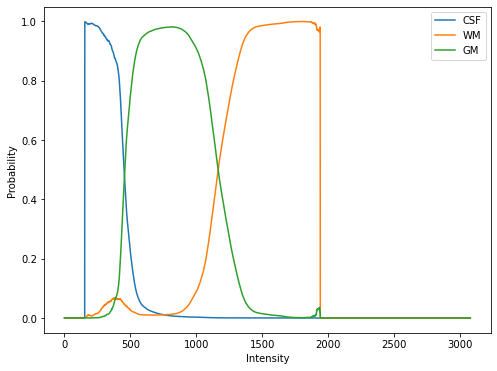

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(intensities,smoothed_histogram_csf,label='CSF')
plt.plot(intensities,smoothed_histogram_wm,label='WM')
plt.plot(intensities,smoothed_histogram_gm,label='GM')
plt.ylabel('Probability')
plt.xlabel('Intensity')
plt.legend(loc='upper right')

In [ ]:
tissue_models= np.vstack((normalized_histogram_csf,normalized_histogram_wm,normalized_histogram_gm))
lut= np.argmax(tissue_models,axis=0)+1
lut_probas= np.amax(tissue_models, axis=0)

In [ ]:
max_number=[]
for i in range(len(test_images)):
    image_read=nib.load(os.path.join(test_images_directory,test_images[i]))
    image_data= image_read.get_fdata()
    image_data= image_data.astype(int)
    max_number.append(np.amax(image_data))
max_test_intensity = np.amax(max_number)


In [ ]:
last_element_lut=lut[-1]
for i in range(max_test_intensity-len(lut)+1):
    lut= np.append(lut,last_element_lut)

In [ ]:
last_element_lut_csf= normalized_histogram_csf[-1]
for i in range(max_test_intensity-len(normalized_histogram_csf)+1):
    normalized_histogram_csf=np.append(normalized_histogram_csf,last_element_lut_csf)

In [ ]:
last_element_lut_wm= normalized_histogram_wm[-1]
for i in range(max_test_intensity-len(normalized_histogram_wm)+1):
    normalized_histogram_wm=np.append(normalized_histogram_wm,last_element_lut_wm)

In [ ]:
last_element_lut_gm= normalized_histogram_gm[-1]
for i in range(max_test_intensity-len(normalized_histogram_gm)+1):
    normalized_histogram_gm=np.append(normalized_histogram_gm,last_element_lut_gm)

In [ ]:
images=[]
segmented_images_csf=[]
segmented_images_wm=[]
segmented_images_gm=[]
images_probas=[]
images_names=[]
label_images_csf=[]
label_images_wm=[]
label_images_gm=[]
dice_scores_csf=[]
dice_scores_wm=[]
dice_scores_gm=[]
probs_csf=[]
probs_wm=[]
probs_gm=[]

for i in range(len(test_images)):
    image_read=nib.load(os.path.join(test_images_directory,test_images[i]))
    image_data= image_read.get_fdata()
    image_data= image_data.astype(int)
    images_names.append(os.path.join(test_images_directory,test_images[i])[-8:])
    images.append(image_data)
    mask_read= nib.load(os.path.join(test_masks_directory,test_masks[i]))
    mask_data= mask_read.get_fdata()
    label_read= nib.load(os.path.join(test_labels_directory,test_labels[i]))
    label_data= label_read.get_fdata()
    label_data[(label_data!=0) & (label_data!=1) & (label_data!=2) & (label_data!=3)] =0 
    seg_img= lut[image_data]
    prob_csf= normalized_histogram_csf[image_data]
    prob_wm= normalized_histogram_wm[image_data]
    prob_gm = normalized_histogram_gm[image_data]
    probs_csf.append(prob_csf)
    probs_wm.append(prob_wm)
    probs_gm.append(prob_gm)
    seg_img= seg_img*mask_data
    seg_csf= (seg_img ==1)
    seg_wm= (seg_img==2)
    seg_gm= (seg_img==3)
    #seg_wm_mask = seg_wm.copy()
    #seg_gm_mask= seg_gm.copy()
    #seg_wm_mask[seg_wm_mask==2]=1
    #seg_gm_mask[seg_gm_mask==3]=1
    label_csf= (label_data==1)
    label_wm= (label_data==2)
    label_gm= (label_data==3)
    #segmented_images_csf.append(seg_csf)
    #segmented_images_wm.append(seg_wm)
    #segmented_images_gm.append(seg_gm)
    #label_images_csf.append(label_csf)
    #label_images_wm.append(label_wm)
    #label_images_gm.append(label_gm)
    ds_csf= dice(seg_csf, label_csf)
    ds_wm= dice(seg_wm, label_wm)
    ds_gm= dice(seg_gm, label_gm)
    dice_scores_csf.append(ds_csf)
    dice_scores_wm.append(ds_wm)
    dice_scores_gm.append(ds_gm)
    print("For Patient # ", i,"Image Name: ", os.path.join(test_images_directory,test_images[i])[-8:],"Dice Score CSF: ", ds_csf, "Dice Score WM: ", ds_wm, "Dice Score GM:", ds_gm)

For Patient #  0 Image Name:  1003.nii Dice Score CSF:  0.3399443284620738 Dice Score WM:  0.805005423622434 Dice Score GM: 0.8230791755828359
For Patient #  1 Image Name:  1004.nii Dice Score CSF:  0.6377349358715818 Dice Score WM:  0.923305234929701 Dice Score GM: 0.9475775001762534
For Patient #  2 Image Name:  1005.nii Dice Score CSF:  0.8728935497824034 Dice Score WM:  0.9189878320703501 Dice Score GM: 0.9456556605727746
For Patient #  3 Image Name:  1018.nii Dice Score CSF:  0.49372093023255814 Dice Score WM:  0.8844284686082424 Dice Score GM: 0.9087259688739701
For Patient #  4 Image Name:  1019.nii Dice Score CSF:  0.4422051965356429 Dice Score WM:  0.9182252349406871 Dice Score GM: 0.9498749357224661
For Patient #  5 Image Name:  1023.nii Dice Score CSF:  0.425563293732077 Dice Score WM:  0.8739520719661917 Dice Score GM: 0.8993048473486129
For Patient #  6 Image Name:  1024.nii Dice Score CSF:  0.5909677419354838 Dice Score WM:  0.8976054024856894 Dice Score GM: 0.92909306613

In [ ]:
results_tm= pd.DataFrame.from_dict({'Patient ID':images_names,'Dice CSF': dice_scores_csf, 'Dice WM': dice_scores_wm, 'Dice GM:': dice_scores_gm})
results_tm.to_csv('F:\\udG\\MISA\\Labs\\Lab3\\dice results\\1.1tissue_model_dice_table.csv', index=None)

### 1.2 Dice Score Computation (Label Propagation)

In [ ]:
# problematic_image = '1023' 
# # Loading and Reading ground truths and masks
# current_gt_directory_1023 = input_lbl_directory + problematic_image + '_3C.nii'
# current_mask_directory_1023 = input_mask_directory + problematic_image + '_1C.nii'
# current_gt_data_1023 = nib.load(current_gt_directory_1023)
# current_gt_1023 = current_gt_data_1023.get_fdata()
# current_mask_data_1023 = nib.load(current_mask_directory_1023)
# current_mask_1023 = current_mask_data_1023.get_fdata()

# unique, counts = np.unique(current_gt_1023, return_counts=True)
# print(dict(zip(unique, counts)))

In [ ]:
# Stacking the probabilities map and generating Segmentation
patient_count = 0
patient_id = []
dice_csf_list = []
dice_wm_list = []
dice_gm_list = []
for data in data_list:

  patient_count += 1

  # Loading test images
  current_patient_csf_prob_directory = output_directory + data + '\\csf\\result.nii'
  current_patient_wm_prob_directory = output_directory + data + '\\wm\\result.nii'
  current_patient_gm_prob_directory = output_directory + data + '\\gm\\result.nii'

  # Reading nifti images
  current_patient_csf_prob_data = nib.load(current_patient_csf_prob_directory)
  current_patient_csf_prob = current_patient_csf_prob_data.get_fdata()
  current_patient_wm_prob_data = nib.load(current_patient_wm_prob_directory)
  current_patient_wm_prob = current_patient_wm_prob_data.get_fdata()
  current_patient_gm_prob_data = nib.load(current_patient_gm_prob_directory)
  current_patient_gm_prob = current_patient_gm_prob_data.get_fdata()

  # Loading and Reading ground truths and masks
  current_gt_directory = input_lbl_directory + data + '_3C.nii'
  current_mask_directory = input_mask_directory + data + '_1C.nii'
  current_gt_data = nib.load(current_gt_directory)
  current_gt = current_gt_data.get_fdata()
  current_mask_data = nib.load(current_mask_directory)
  current_mask = current_mask_data.get_fdata()

  # Handling the problematic level image
  current_gt[(current_gt!=0) & (current_gt!=1) & (current_gt!=2) & (current_gt!=3)] = 0

  # Stacking and genrating labels from tissue probabilities
  label_probs_stacked = np.stack((current_patient_csf_prob,current_patient_wm_prob,current_patient_gm_prob), axis = -1)
  current_label_image = np.argmax(label_probs_stacked, axis=-1) + 1
  current_label_image = current_label_image * current_mask
  
  # Computing Dice for each Tissue
  current_csf_gt = (current_gt==1)  
  current_wm_gt = (current_gt==2)
  current_gm_gt = (current_gt==3)

  current_csf = (current_label_image==1)  
  current_wm = (current_label_image==2)
  current_gm = (current_label_image==3)

  dice_csf = dice(current_csf, current_csf_gt)
  dice_wm = dice(current_wm, current_wm_gt)
  dice_gm = dice(current_gm, current_gm_gt)

  patient_id.append(data+'.nii')
  dice_csf_list.append(dice_csf)
  dice_wm_list.append(dice_wm)
  dice_gm_list.append(dice_gm)

  print("For Patient # ", patient_count,"Image Name: ", data+'.nii',"Dice Score CSF: ", dice_csf, "Dice Score WM: ", dice_wm, "Dice Score GM:", dice_gm)

For Patient #  1 Image Name:  1003.nii Dice Score CSF:  0.6864261614326499 Dice Score WM:  0.8062423320029196 Dice Score GM: 0.8641700188138479
For Patient #  2 Image Name:  1004.nii Dice Score CSF:  0.8068311195445921 Dice Score WM:  0.8004033008575291 Dice Score GM: 0.8490324085569123
For Patient #  3 Image Name:  1005.nii Dice Score CSF:  0.8421666004502715 Dice Score WM:  0.7757362383455396 Dice Score GM: 0.8458610639592608
For Patient #  4 Image Name:  1018.nii Dice Score CSF:  0.7921529259212783 Dice Score WM:  0.801983919807873 Dice Score GM: 0.8566480013001411
For Patient #  5 Image Name:  1019.nii Dice Score CSF:  0.7222190185110432 Dice Score WM:  0.7871363781931023 Dice Score GM: 0.8546328121042844
For Patient #  6 Image Name:  1023.nii Dice Score CSF:  0.699558764540714 Dice Score WM:  0.8016896609533851 Dice Score GM: 0.8622540298650233
For Patient #  7 Image Name:  1024.nii Dice Score CSF:  0.7793446281830172 Dice Score WM:  0.7942259377627169 Dice Score GM: 0.85654705141

In [ ]:
dice_table_label_prop = pd.DataFrame.from_dict({'Patient ID':patient_id, 'Dice CSF': dice_csf_list, 'Dice WM': dice_wm_list, 'Dice GM': dice_gm_list})
dice_table_label_prop.to_csv('F:\\udG\\MISA\\Labs\\Lab3\\dice results\\1.2label_propagation_dice_table.csv', index=None)

### 1.3 Dice Score Computation (Tissue Model & Label Propagation)

1.   Elemento de lista
2.   Elemento de lista



In [ ]:
# Stacking the probabilities map and generating Segmentation
cmb_patient_count = 0
cmb_patient_id = []
cmb_dice_csf_list = []
cmb_dice_wm_list = []
cmb_dice_gm_list = []

# csf_model_prob = pickle.load(open('F:\\udG\\MISA\\Labs\\Lab3\\Tissue Model Probabilities\\csf_prob.p', 'rb'))
# wm_model_prob = pickle.load(open('F:\\udG\\MISA\\Labs\\Lab3\\Tissue Model Probabilities\\wm_prob.p', 'rb'))
# gm_model_prob = pickle.load(open('F:\\udG\\MISA\\Labs\\Lab3\\Tissue Model Probabilities\\gm_prob.p', 'rb'))

for data in range(len(data_list)):

  cmb_patient_count += 1

  # Loading probabilities from label propagation
  current_patient_csf_prob_directory = output_directory + data_list[data] + '\\csf\\result.nii'
  current_patient_wm_prob_directory = output_directory + data_list[data] + '\\wm\\result.nii'
  current_patient_gm_prob_directory = output_directory + data_list[data] + '\\gm\\result.nii'

  # Reading nifti images from label propagation
  current_patient_csf_prob_data = nib.load(current_patient_csf_prob_directory)
  current_patient_csf_prob = current_patient_csf_prob_data.get_fdata()
  current_patient_wm_prob_data = nib.load(current_patient_wm_prob_directory)
  current_patient_wm_prob = current_patient_wm_prob_data.get_fdata()
  current_patient_gm_prob_data = nib.load(current_patient_gm_prob_directory)
  current_patient_gm_prob = current_patient_gm_prob_data.get_fdata()

  # Loading probabilities from tissue models

  image_read=nib.load(os.path.join(test_images_directory,data_list[data]+'.nii'))
  image_data= image_read.get_fdata()
  image_data= image_data.astype(int)
  mask_read= nib.load(os.path.join(test_masks_directory,data_list[data]+'_1C.nii'))
  mask_data= mask_read.get_fdata()
  label_read= nib.load(os.path.join(test_labels_directory,data_list[data]+'_3C.nii'))
  label_data= label_read.get_fdata()
  label_data[(label_data!=0) & (label_data!=1) & (label_data!=2) & (label_data!=3)] =0 
  current_patient_csf_prob_tm= normalized_histogram_csf[image_data]
  current_patient_wm_prob_tm = normalized_histogram_wm[image_data]
  current_patient_gm_prob_tm = normalized_histogram_gm[image_data]

  # Multiplying probabilities from tissue models and label propagation
  csf_prob_combined = np.multiply(current_patient_csf_prob_tm ,current_patient_csf_prob)
  wm_prob_combined = np.multiply(current_patient_wm_prob_tm ,current_patient_wm_prob)
  gm_prob_combined = np.multiply(current_patient_gm_prob_tm ,current_patient_gm_prob)

  # Loading and Reading ground truths and masks
  current_gt_directory = input_lbl_directory + data_list[data] + '_3C.nii'
  current_mask_directory = input_mask_directory + data_list[data] + '_1C.nii'
  current_gt_data = nib.load(current_gt_directory)
  current_gt = current_gt_data.get_fdata()
  current_mask_data = nib.load(current_mask_directory)
  current_mask = current_mask_data.get_fdata()

  # Handling the problematic level image
  current_gt[(current_gt!=0) & (current_gt!=1) & (current_gt!=2) & (current_gt!=3)] = 0

  # Stacking and genrating labels from tissue probabilities
  label_probs_stacked = np.stack((csf_prob_combined, wm_prob_combined, gm_prob_combined), axis = -1)
  current_label_image = np.argmax(label_probs_stacked, axis=-1) + 1
  current_label_image = current_label_image * current_mask
  
  # Computing Dice for each Tissue
  current_csf_gt = (current_gt==1)  
  current_wm_gt = (current_gt==2)
  current_gm_gt = (current_gt==3)

  current_csf = (current_label_image==1)  
  current_wm = (current_label_image==2)
  current_gm = (current_label_image==3)

  dice_csf = dice(current_csf, current_csf_gt)
  dice_wm = dice(current_wm, current_wm_gt)
  dice_gm = dice(current_gm, current_gm_gt)

  cmb_patient_id.append(data_list[data]+'.nii')
  cmb_dice_csf_list.append(dice_csf)
  cmb_dice_wm_list.append(dice_wm)
  cmb_dice_gm_list.append(dice_gm)

  print("For Patient # ", cmb_patient_count,"Image Name: ", data_list[data]+'.nii',"Dice Score CSF: ", dice_csf, "Dice Score WM: ", dice_wm, "Dice Score GM:", dice_gm)

For Patient #  1 Image Name:  1003.nii Dice Score CSF:  0.6696292365855276 Dice Score WM:  0.8604148519163763 Dice Score GM: 0.8891900914831392
For Patient #  2 Image Name:  1004.nii Dice Score CSF:  0.8287596048298573 Dice Score WM:  0.9311575482792163 Dice Score GM: 0.9529769433903647
For Patient #  3 Image Name:  1005.nii Dice Score CSF:  0.9157422305021594 Dice Score WM:  0.9173603020366656 Dice Score GM: 0.9482423471704968
For Patient #  4 Image Name:  1018.nii Dice Score CSF:  0.7651779813048815 Dice Score WM:  0.906722819004425 Dice Score GM: 0.9320770579525185
For Patient #  5 Image Name:  1019.nii Dice Score CSF:  0.7475254237288136 Dice Score WM:  0.9217728809891594 Dice Score GM: 0.9529516862479
For Patient #  6 Image Name:  1023.nii Dice Score CSF:  0.7302516820333915 Dice Score WM:  0.9082389861514772 Dice Score GM: 0.9329940894218346
For Patient #  7 Image Name:  1024.nii Dice Score CSF:  0.7977278711958771 Dice Score WM:  0.9116258378065312 Dice Score GM: 0.9410706416358

In [ ]:
dice_table_combined = pd.DataFrame.from_dict({'Patient ID':cmb_patient_id, 'Dice CSF': cmb_dice_csf_list, 'Dice WM': cmb_dice_wm_list, 'Dice GM': cmb_dice_gm_list})
dice_table_combined.to_csv('F:\\udG\\MISA\\Labs\\Lab3\\dice results\\1.3lptm_combined_dice_table.csv', index=None)

### **Slice Printing**

In [ ]:
# Visualize 2D Slice from 3D Image
def slice_show(image, slice_no, title):
    """
    Inputs: 
    image => Nifti Image that need to be visualized,
    slice_no => Slice Number from 1 to 48
    title => The title of the Image
    
    output: Plot Image.

    """ 
    plt.figure()
    plt.axis('off')
    plt.title(title)
    plt.imshow(image[:,:,slice_no].T, cmap='gray')

NameError: ignored

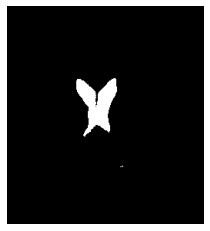

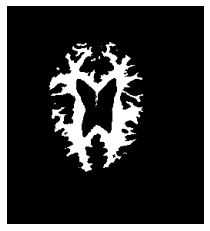

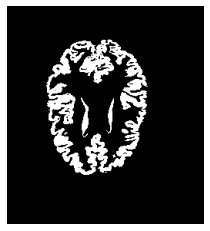

In [ ]:
images=[]
segmented_images_csf=[]
segmented_images_wm=[]
segmented_images_gm=[]
images_probas=[]
images_names=[]
label_images_csf=[]
label_images_wm=[]
label_images_gm=[]
dice_scores_csf=[]
dice_scores_wm=[]
dice_scores_gm=[]
probs_csf=[]
probs_wm=[]
probs_gm=[]

data = 2
# Stacking the probabilities map and generating Segmentation
cmb_patient_count = 0
cmb_patient_id = []
cmb_dice_csf_list = []
cmb_dice_wm_list = []
cmb_dice_gm_list = []

# csf_model_prob = pickle.load(open('F:\\udG\\MISA\\Labs\\Lab3\\Tissue Model Probabilities\\csf_prob.p', 'rb'))
# wm_model_prob = pickle.load(open('F:\\udG\\MISA\\Labs\\Lab3\\Tissue Model Probabilities\\wm_prob.p', 'rb'))
# gm_model_prob = pickle.load(open('F:\\udG\\MISA\\Labs\\Lab3\\Tissue Model Probabilities\\gm_prob.p', 'rb'))



cmb_patient_count += 1

# Loading probabilities from label propagation
current_patient_csf_prob_directory = output_directory + data_list[data] + '\\csf\\result.nii'
current_patient_wm_prob_directory = output_directory + data_list[data] + '\\wm\\result.nii'
current_patient_gm_prob_directory = output_directory + data_list[data] + '\\gm\\result.nii'

# Reading nifti images from label propagation
current_patient_csf_prob_data = nib.load(current_patient_csf_prob_directory)
current_patient_csf_prob = current_patient_csf_prob_data.get_fdata()
current_patient_wm_prob_data = nib.load(current_patient_wm_prob_directory)
current_patient_wm_prob = current_patient_wm_prob_data.get_fdata()
current_patient_gm_prob_data = nib.load(current_patient_gm_prob_directory)
current_patient_gm_prob = current_patient_gm_prob_data.get_fdata()

# Loading probabilities from tissue models

image_read=nib.load(os.path.join(test_images_directory,data_list[data]+'.nii'))
image_data= image_read.get_fdata()
image_data= image_data.astype(int)
mask_read= nib.load(os.path.join(test_masks_directory,data_list[data]+'_1C.nii'))
mask_data= mask_read.get_fdata()
label_read= nib.load(os.path.join(test_labels_directory,data_list[data]+'_3C.nii'))
label_data= label_read.get_fdata()
label_data[(label_data!=0) & (label_data!=1) & (label_data!=2) & (label_data!=3)] =0 
current_patient_csf_prob_tm= normalized_histogram_csf[image_data]
current_patient_wm_prob_tm = normalized_histogram_wm[image_data]
current_patient_gm_prob_tm = normalized_histogram_gm[image_data]

# Multiplying probabilities from tissue models and label propagation
csf_prob_combined = np.multiply(current_patient_csf_prob_tm ,current_patient_csf_prob)
wm_prob_combined = np.multiply(current_patient_wm_prob_tm ,current_patient_wm_prob)
gm_prob_combined = np.multiply(current_patient_gm_prob_tm ,current_patient_gm_prob)

# Loading and Reading ground truths and masks
current_gt_directory = input_lbl_directory + data_list[data] + '_3C.nii'
current_mask_directory = input_mask_directory + data_list[data] + '_1C.nii'
current_gt_data = nib.load(current_gt_directory)
current_gt = current_gt_data.get_fdata()
current_mask_data = nib.load(current_mask_directory)
current_mask = current_mask_data.get_fdata()

# Handling the problematic level image
current_gt[(current_gt!=0) & (current_gt!=1) & (current_gt!=2) & (current_gt!=3)] = 0

# Stacking and genrating labels from tissue probabilities
label_probs_stacked = np.stack((csf_prob_combined, wm_prob_combined, gm_prob_combined), axis = -1)
current_label_image = np.argmax(label_probs_stacked, axis=-1) + 1
current_label_image = current_label_image * current_mask

# Computing Dice for each Tissue
current_csf_gt = (current_gt==1)  
current_wm_gt = (current_gt==2)
current_gm_gt = (current_gt==3)

current_csf = (current_label_image==1)  
current_wm = (current_label_image==2)
current_gm = (current_label_image==3)

slice_show(current_csf, 150, '')

slice_show(current_wm, 150, '')

slice_show(current_gm, 150, '')

dice_csf = dice(current_csf, current_csf_gt)
dice_wm = dice(current_wm, current_wm_gt)
dice_gm = dice(current_gm, current_gm_gt)

cmb_patient_id.append(data_list[data]+'.nii')
cmb_dice_csf_list.append(dice_csf)
cmb_dice_wm_list.append(dice_wm)
cmb_dice_gm_list.append(dice_gm)

print("For Patient # ", cmb_patient_count,"Image Name: ", data_list[data]+'.nii',"Dice Score CSF: ", dice_csf, "Dice Score WM: ", dice_wm, "Dice Score GM:", dice_gm)